In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
from google.colab import files

uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [0]:
df=pd.read_csv("./diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
y=df["Outcome"]
X=df.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.30,
                                                  random_state=42)

In [7]:
!pip install catboost

     |████████████████████████████████| 64.8MB 59kB/s 


In [0]:
from catboost import CatBoostClassifier

In [0]:
catb_model=CatBoostClassifier().fit(X_train, y_train, verbose=False)

In [10]:
y_pred=catb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

In [0]:
catb=CatBoostClassifier()

In [0]:
catb_params={"learning_rate":[0.01,0.03,0.1],
            "iterations":[200,500,100],
            "depth":[4,5,8]}

In [15]:
catb_cv_model=GridSearchCV(catb, catb_params, cv=5, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  1.2min finished


0:	learn: 0.6730562	total: 5.11ms	remaining: 1.02s
1:	learn: 0.6583303	total: 9.08ms	remaining: 899ms
2:	learn: 0.6413852	total: 12.9ms	remaining: 849ms
3:	learn: 0.6268405	total: 16.7ms	remaining: 818ms
4:	learn: 0.6150883	total: 20.6ms	remaining: 802ms
5:	learn: 0.5989093	total: 24.3ms	remaining: 787ms
6:	learn: 0.5861303	total: 28.1ms	remaining: 775ms
7:	learn: 0.5735117	total: 31.8ms	remaining: 763ms
8:	learn: 0.5616370	total: 35.6ms	remaining: 755ms
9:	learn: 0.5507706	total: 39.2ms	remaining: 745ms
10:	learn: 0.5388394	total: 43.1ms	remaining: 740ms
11:	learn: 0.5264516	total: 46.7ms	remaining: 732ms
12:	learn: 0.5191660	total: 50.4ms	remaining: 725ms
13:	learn: 0.5104459	total: 54.1ms	remaining: 719ms
14:	learn: 0.5017018	total: 57.7ms	remaining: 712ms
15:	learn: 0.4954928	total: 61.4ms	remaining: 706ms
16:	learn: 0.4896817	total: 65.1ms	remaining: 701ms
17:	learn: 0.4808546	total: 68.8ms	remaining: 695ms
18:	learn: 0.4724010	total: 72.6ms	remaining: 691ms
19:	learn: 0.4657244	t

In [16]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.03}

In [17]:
catb_tuned=CatBoostClassifier(learning_rate= 0.03, depth= 8, iterations= 200).fit(X_train, y_train)

0:	learn: 0.6730562	total: 10ms	remaining: 2s
1:	learn: 0.6583303	total: 14.2ms	remaining: 1.4s
2:	learn: 0.6413852	total: 18.1ms	remaining: 1.19s
3:	learn: 0.6268405	total: 21.9ms	remaining: 1.07s
4:	learn: 0.6150883	total: 25.8ms	remaining: 1s
5:	learn: 0.5989093	total: 29.6ms	remaining: 957ms
6:	learn: 0.5861303	total: 33.4ms	remaining: 920ms
7:	learn: 0.5735117	total: 37.5ms	remaining: 901ms
8:	learn: 0.5616370	total: 41.4ms	remaining: 879ms
9:	learn: 0.5507706	total: 45.4ms	remaining: 862ms
10:	learn: 0.5388394	total: 49.5ms	remaining: 850ms
11:	learn: 0.5264516	total: 53.8ms	remaining: 843ms
12:	learn: 0.5191660	total: 58.1ms	remaining: 835ms
13:	learn: 0.5104459	total: 62.5ms	remaining: 830ms
14:	learn: 0.5017018	total: 66.4ms	remaining: 819ms
15:	learn: 0.4954928	total: 70.2ms	remaining: 808ms
16:	learn: 0.4896817	total: 74.1ms	remaining: 798ms
17:	learn: 0.4808546	total: 78ms	remaining: 789ms
18:	learn: 0.4724010	total: 82ms	remaining: 781ms
19:	learn: 0.4657244	total: 86ms	re

In [18]:
y_pred=catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

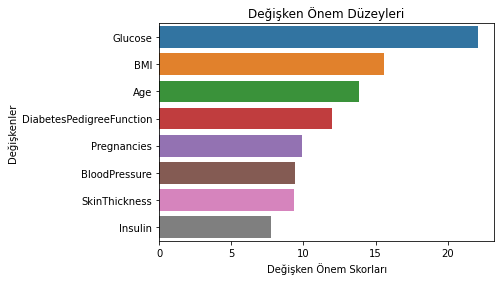

In [19]:
#değişken önem düzeyleri
feature_imp=pd.Series(catb_tuned.feature_importances_,
                      index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()